In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Loading dataset into a notebook

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
cols = [col_name.lower().replace(' ', '_') for col_name in data.columns]
data.columns = cols

### 2. Creating barplot of the number of customers per gender

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Number of Customers'),
 Text(0.5, 1.0, 'Gender')]

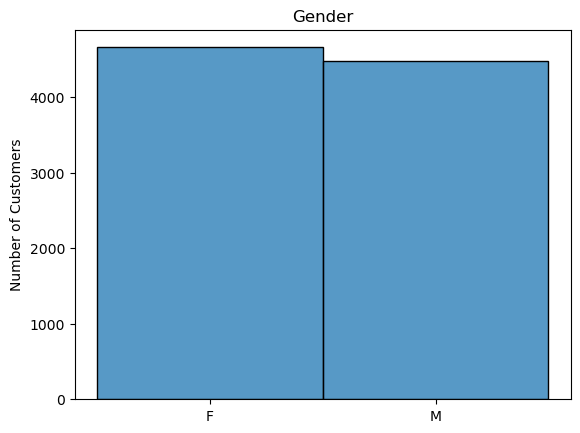

In [8]:
sns.histplot(data['gender'], discrete = True).set(xlabel = '', ylabel = 'Number of Customers', title = 'Gender')

*Most customers are men*

### 3. Creating barplot of the number of customers per EmploymentStatus and Gender

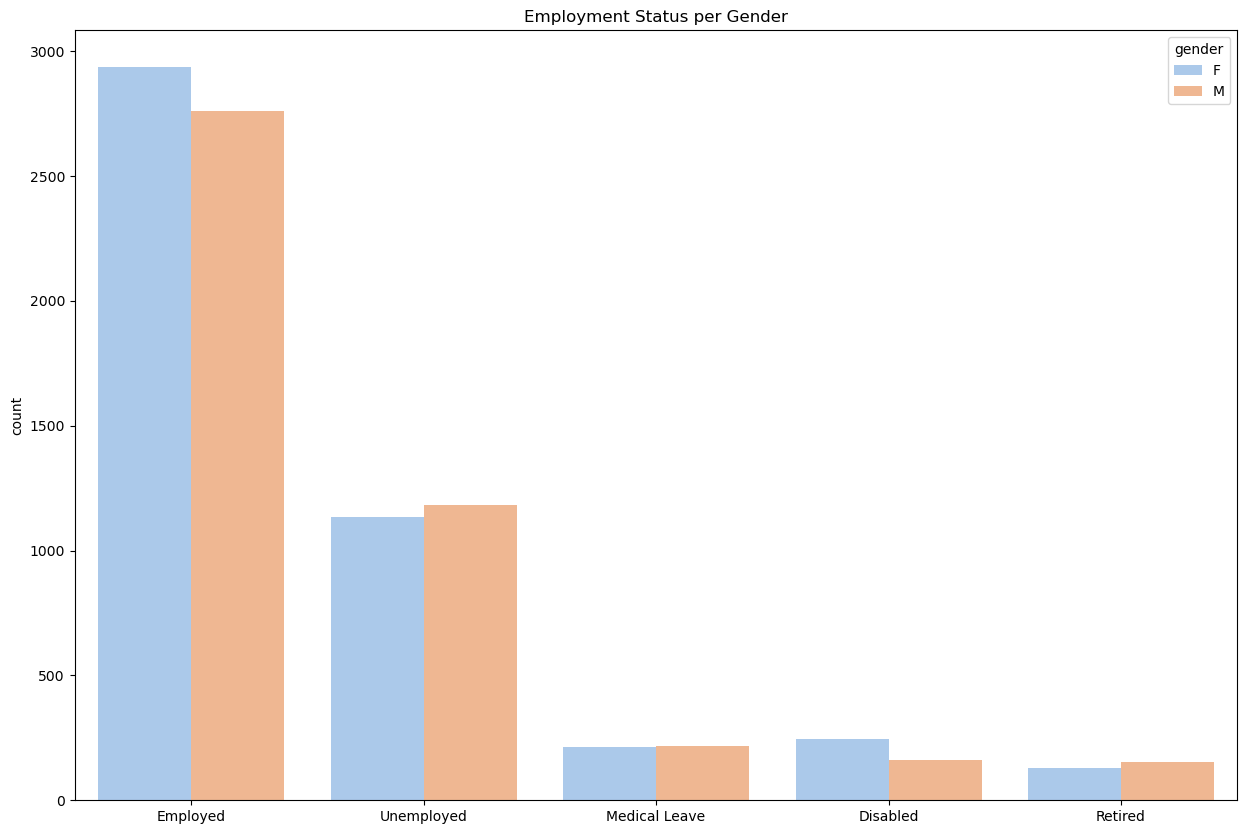

In [14]:
plt.rcParams['figure.figsize'] = 15,10

with sns.color_palette('pastel'):
    sns.countplot(data = data, x = 'employmentstatus', hue = 'gender').set(xlabel = '', title = 'Employment Status per Gender')

- Most employed customers are men
- The opposite is true for unemployed customers, that are mostly women
- For medical leave the numbers are almost equal
- Most disabled customers are men
- Most retired customers are women (here it might be important to consider relative death rates for genders of the binary)

### 4. Identifying measurements and dimensions

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

- Tableau reads the variables monthly premium auto, months since_last_claim, months_since_policy_inception, number_of_open_complaints as continuous variables instead of integers
- But it reads effective_to_date right (as datetime) contrary to python that reads it as string
- In addition, Tableau not only categorises State as string, but it recognises that the string values of the variable are in fact geographical areas (State/Province)